In [605]:
import numpy as np
import pandas as pd
from collections import Counter

In [606]:
# Constants used throughout this notebook
TEST_SIZE = 0.2
RANDOM_STATE = 42
MINORITY_CLASS = 1
MAJORITY_CLASS = 0

In [607]:
# Local file URL
COMBINED_FEATURE_DATASET = "/Users/desmond0429/Library/CloudStorage/OneDrive-Personal/NUS Modules/NUS Y3S1 Mods/CS3244/Dataset Backup/Final Dataset/combined_features.csv"

In [608]:
# Create dataframes from dataset
df = pd.read_csv(COMBINED_FEATURE_DATASET)

In [609]:
df.head(5)

,freq_qid1,freq_qid2,q1len,q2len,q1_words,q2_words,q1_characters,q2_characters,q1_u_words,q2_u_words,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio,is_duplicate
0,1,1,75,55,14,10,22,23,14,10,...,0,0,4,12.0,20,38,36,39,0.089286,0
1,1,1,35,34,7,6,16,16,7,6,...,0,1,1,6.5,72,74,66,66,0.257143,1
2,2,1,44,49,8,10,16,16,7,10,...,0,1,2,9.0,62,60,53,55,0.155556,0
3,3,3,27,28,6,8,16,16,6,7,...,0,1,2,7.0,77,74,77,88,0.392857,1
4,1,1,67,121,13,20,20,25,13,19,...,0,0,7,16.5,26,39,38,45,0.176471,0


In [610]:
df.shape

(363846, 48)

In [611]:
# Partion the features from the class to predict
df_combined_features = df[df.columns[df.columns != 'is_duplicate']].copy() # get columns that are not 'is_duplicate' (aka feature columns)
df_label = df['is_duplicate'].copy() # get the column named 'is_duplicate'; this is our label

In [612]:
df_combined_features.shape

(363846, 47)

In [613]:
df_label.shape

(363846,)

In [614]:
# Convert dataframes to numpy array
X = df_combined_features.to_numpy()
y = df_label.to_numpy()

In [615]:
from sklearn.model_selection import train_test_split

# Split to train and test set before undersampling to avoid data leakage(snooping)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [616]:
# Count the frequency of 0 and 1 in label from y
def count_label(y):
  return Counter(y.ravel())

In [617]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample input X and label y randomly
def random_under_sampling(X, y):
  rus = RandomUnderSampler(random_state=RANDOM_STATE)
  X_rus, y_rus = rus.fit_resample(X, y)
  return X_rus, y_rus

In [618]:
# Plot bar chart for label
def plot_bar_chart(label, title):
  df_label = pd.DataFrame({'duplicate_mark': label.ravel()})
  df_label['is_duplicate'] = np.where(df_label['duplicate_mark']==1, "is duplicate", "not duplicate")
  df_label.drop('duplicate_mark', axis=1, inplace=True)
  df_label['is_duplicate'].value_counts().plot.bar(title=title, rot=0)

In [619]:
# Undersampling on train set
y_train_label_count = count_label(y_train)
print(f'Before undersampling on train set: {y_train_label_count}')

X_train_rus, y_train_rus = random_under_sampling(X_train, y_train)
y_train_rus_label_count = count_label(y_train_rus)
print(f'After undersampling on train set: {y_train_rus_label_count}')

# Check that majority class have been undersampled to same count as that of minority class
assert  y_train_rus_label_count[MAJORITY_CLASS] == y_train_label_count[MINORITY_CLASS]

Before undersampling on train set: Counter({0: 183437, 1: 107639})
After undersampling on train set: Counter({0: 107639, 1: 107639})


In [620]:
# Undersampling on test set
y_test_label_count = count_label(y_test)
print(f'Before undersampling on test set: {count_label(y_test)}')

X_test_rus, y_test_rus = random_under_sampling(X_test, y_test)
y_test_rus_label_count = count_label(y_test_rus)
print(f'After undersampling on test set: {count_label(y_test_rus)}')

# Check that majority class have been undersampled to same count as that of minority class
assert  y_test_rus_label_count[MAJORITY_CLASS] == y_test_label_count[MINORITY_CLASS]

Before undersampling on test set: Counter({0: 45996, 1: 26774})
After undersampling on test set: Counter({0: 26774, 1: 26774})


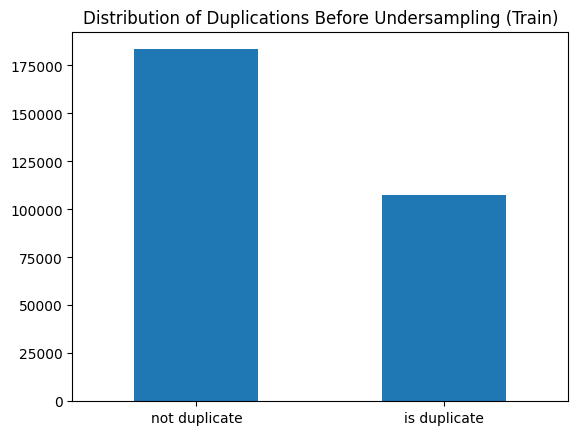

In [621]:
plot_bar_chart(y_train, "Distribution of Duplications Before Undersampling (Train)")

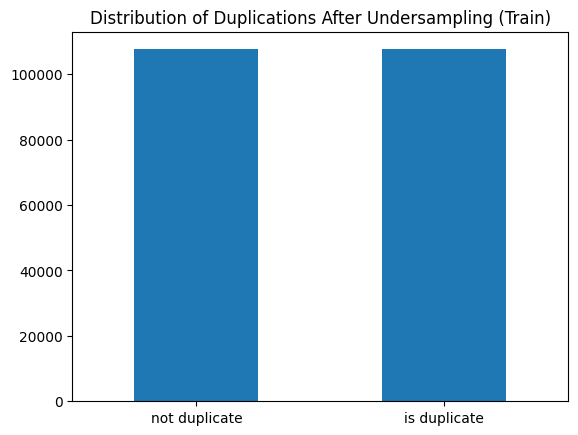

In [622]:
plot_bar_chart(y_train_rus, "Distribution of Duplications After Undersampling (Train)")

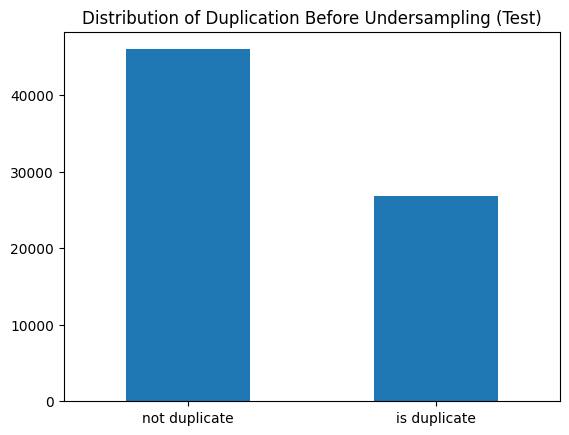

In [623]:
plot_bar_chart(y_test, "Distribution of Duplication Before Undersampling (Test)")


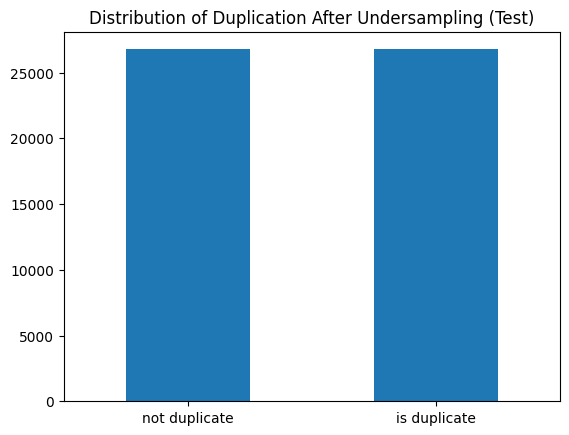

In [624]:
plot_bar_chart(y_test_rus, "Distribution of Duplication After Undersampling (Test)")

In [625]:
# Expand y_train_rus dimension at y-axis (i.e. from [l1, l2, ..., ln] to [[l1, l2, ..., ln]])
y_train_rus = np.expand_dims(y_train_rus, axis=1)
print(f"X_train_rus's shape: {X_train_rus.shape}")
print(f"y_train_rus's shape: {y_train_rus.shape}")

# Concatenate X_train_rus and y_train_rus together
data_train_rus = np.concatenate((X_train_rus, y_train_rus), axis=1)
print(f"data_train_rus's shape: {data_train_rus.shape}")

# Check that the combined numpy array has 48 columns (47 features + 1 label)
assert data_train_rus.shape[1] == 48

# Convert the combined numpy array to dataframe, using original dataframe columns as the label
df_train_rus = pd.DataFrame(data=data_train_rus, columns=df.columns)

# Apply the original column datatypes
df_train_rus = df_train_rus.astype(df.dtypes)

df_train_rus.head(5)

X_train_rus's shape: (215278, 47)
y_train_rus's shape: (215278, 1)
data_train_rus's shape: (215278, 48)


,freq_qid1,freq_qid2,q1len,q2len,q1_words,q2_words,q1_characters,q2_characters,q1_u_words,q2_u_words,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio,is_duplicate
0,1,1,42,120,9,21,17,23,9,19,...,0,0,12,15.0,30,31,27,34,0.139535,0
1,1,1,33,23,7,4,16,15,7,4,...,0,1,3,5.5,59,70,59,81,0.458333,0
2,2,1,81,48,14,8,25,17,14,8,...,0,0,6,11.0,11,31,32,46,0.142857,0
3,1,1,18,123,5,33,15,28,5,17,...,0,0,28,19.0,17,44,14,40,0.105263,0
4,1,1,53,75,9,15,19,21,9,14,...,0,1,6,12.0,37,40,34,39,0.092593,0


In [626]:
# Expand y_test_rus dimension at y-axis (i.e. from [l1, l2, ..., ln] to [[l1, l2, ..., ln]])
y_test_rus = np.expand_dims(y_test_rus, axis=1)
print(f"X_test_rus's shape: {X_test_rus.shape}")
print(f"y_test_rus's shape: {y_test_rus.shape}")

# Concatenate X_train_rus and y_train_rus together
data_test_rus = np.concatenate((X_test_rus, y_test_rus), axis=1)
print(f"data_test_rus's shape: {data_test_rus.shape}")

# Check that the combined numpy array has 48 columns (47 features + 1 label)
assert data_test_rus.shape[1] == 48

# Convert the combined numpy array to dataframe to be output as .csv file, using original dataframe columns as the label
df_test_rus = pd.DataFrame(data=data_test_rus, columns=df.columns)

# Apply the original column datatypes
df_test_rus = df_test_rus.astype(df.dtypes)

df_test_rus.head(5)

X_test_rus's shape: (53548, 47)
y_test_rus's shape: (53548, 1)
data_test_rus's shape: (53548, 48)


,freq_qid1,freq_qid2,q1len,q2len,q1_words,q2_words,q1_characters,q2_characters,q1_u_words,q2_u_words,...,last_word_eq,first_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,longest_substr_ratio,is_duplicate
0,2,3,27,73,5,13,15,19,5,10,...,0,1,8,9.0,39,52,47,73,0.392857,0
1,2,1,56,32,9,5,19,16,8,5,...,1,1,4,7.0,72,66,73,100,0.515152,0
2,1,1,140,128,31,28,22,24,24,24,...,0,0,3,29.5,30,33,34,26,0.046512,0
3,1,1,53,41,11,8,17,20,10,8,...,0,0,3,9.5,41,46,55,62,0.285714,0
4,2,2,36,39,7,7,18,18,7,7,...,0,1,0,7.0,60,58,79,87,0.324324,0


In [627]:
# Save as .csv file
df_train_rus.to_csv("/Users/desmond0429/Library/CloudStorage/OneDrive-Personal/NUS Modules/NUS Y3S1 Mods/CS3244/Dataset Backup/Final Dataset/undersampled_train_dataset.csv", index=False)
df_test_rus.to_csv("/Users/desmond0429/Library/CloudStorage/OneDrive-Personal/NUS Modules/NUS Y3S1 Mods/CS3244/Dataset Backup/Final Dataset/undersampled_test_dataset.csv", index=False)